<a href="https://colab.research.google.com/github/jvataidee/kangleCOVID19_textos/blob/master/COVID_19_Kaggle_Textos4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://static.wixstatic.com/media/bdd7cb_7cbf8aa255ec468a97ab036d55c121c3~mv2.png/v1/fill/w_408,h_86,al_c,q_85,usm_0.66_1.00_0.01/Ativo%2013%404x.webp)

# COVID-19 - Kaggle Textos Parte 4
Em resposta à pandemia do COVID-19, a Casa Branca juntamente com os principais grupos de pesquisa dos USA, prepararam o conjunto de dados aberto de pesquisa do COVID-19.<p>

Tais pesquisas resultaram mais de 57.000 artigos acadêmicos, incluindo mais de 45.000 com texto completo, sobre COVID-19, SARS-CoV-2 e coronavírus relacionados. <p>
Esse conjunto de dados disponível gratuitamente é fornecido à comunidade de pesquisa global para aplicar os recentes avanços no processamento de linguagem natural e outras técnicas de IA para gerar novos insights em apoio à luta contínua contra essa doença infecciosa.

- Link para o desafio: https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge

Devido a crescente urgência e a rápida aceleração na nova literatura sobre coronavírus, dificultando o acompanhamento da comunidade de pesquisa médica. Em detrimento a isso, há presente pesquisa, tem como objetivo identificar por meio de ML, reconhecer entidades, palavra chaves de documentos, similaridades entre os documentos e agrupalos, facilitando então a comunidade médica.

Adaptado: Jones Granatyr - IA Expert

## Instalação e importação das bibliotecas

In [0]:
#bibliotecas principais
import numpy as np
import zipfile
import pandas as pd
import glob
import json
import seaborn as sns
import spacy
import nltk
from IPython.core.display import HTML
from matplotlib import pyplot as plt


In [0]:
# configurar a visualização
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [0]:
#instalando bibliotecas de termos
!pip install scispacy

In [0]:
#importando bibliotecas de termos
import scispacy

In [0]:
#instalando bibliotecas de termos médicos
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_md-0.2.4.tar.gz

In [0]:
#importando bibliotecas de termos médicos
import en_core_sci_md

In [0]:
!python -m spacy download en

#Agrupamento com K-Means

##Tratamento da base

In [0]:
#carregando a base compelta
corona_df_completo = pd.read_csv('/content/gdrive/My Drive/corona_df_completo.csv')
corona_df_completo.shape

(20211, 5)

In [0]:
corona_df_completo = corona_df_completo.dropna()
corona_df_completo.shape

(20209, 5)

In [0]:
pd.set_option('display.max_colwidth', 100)
corona_df_completo.head()

Unnamed: 0  ...                                                                                                 text
0           0  ...  influenza virus belong orthomyxoviridae family classify type recently identify type influenza vi...
1           1  ...  incidence acute respiratory distress syndrome ards elevate mortality recent study reach severe f...
2           2  ...  respiratory tract infection lead mortality morbidity child especially early year child respirato...
3           3  ...  correspondence ralf.bartenschlager@med uni-heidelberg.de brief cortese al. zikv infection human ...
4           4  ...  acinetobacter baumannii important nosocomial pathogen associate epidemic outbreak infection orga...

[5 rows x 5 columns]

##Usando TF-IDF


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
dataset_texts = corona_df_completo['text'].tolist()

In [0]:
len(dataset_texts)

20209

In [0]:
#Vetorizando os documentos
tfidf = TfidfVectorizer(max_features=2**12)
vectorized = tfidf.fit_transform(dataset_texts)
vectorized

<20209x4096 sparse matrix of type '<class 'numpy.float64'>'
	with 11349590 stored elements in Compressed Sparse Row format>

## Redução de dimensionalidade

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(vectorized.toarray())

In [0]:
components = pca.explained_variance_ratio_
components

array([0.02676681, 0.01543113])

In [0]:
#Plotando os arquivos
sns.set(rc={'figure.figsize': (10,8)})
sns.scatterplot(X_pca[:,0], X_pca[:, 1])
plt.title('Covid-19 Papers');

## Definição do número de clusters


- Baixando o algoritimo  [Fast K-means:](https://www.researchgate.net/publication/51929167_Fast_K-Means_Algorithm_Clustering) para realizar os agrupamentos os mais rapidos possivel.

In [0]:
from sklearn.cluster import MiniBatchKMeans

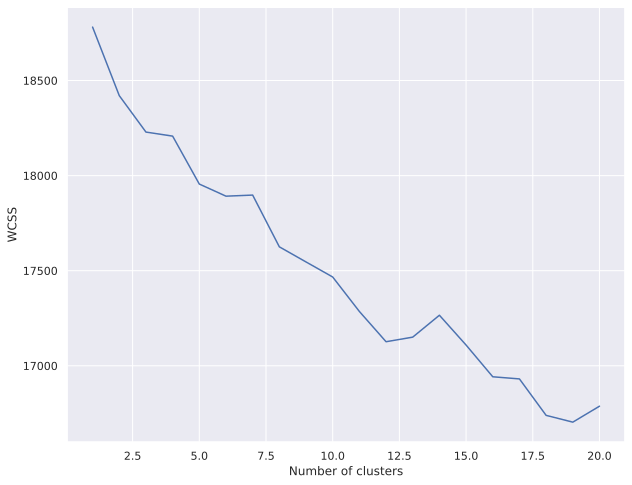

In [0]:
wcss = []

#Executando em 20 vezes
for i in range(1, 21):
  kmeans = MiniBatchKMeans(n_clusters = i, random_state = 0)
  kmeans.fit(vectorized)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

Atravez deste grafico wcss, vemos que a maior queda é o valor proximo de 10, desta forma definiu-se k = 10, porem para melhor vizualização reduziremos para k = 5.

##Grupos

In [0]:
k = 5
kmeans = MiniBatchKMeans(n_clusters = k)
y_pred = kmeans.fit_predict(vectorized)

In [0]:
np.unique(y_pred)

array([0, 1, 2, 3, 4], dtype=int32)

In [0]:
len(y_pred)

20209

In [0]:
palette = sns.color_palette(sns.diverging_palette(255, 133, l=60, n=7, center="dark"), len( set (y_pred)))

sns.scatterplot(X_pca[:,0], X_pca[:, 1], hue=y_pred, legend='full', palette=palette)
plt.title('Clustered Covid-19 Papers');